In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

In [2]:
# Load dataset
data = pd.read_csv("../data/dataset_2.csv")

# 1. Understanding the Dataset

In [3]:
print("First 5 rows of the dataset:")
print(data.head(5))

First 5 rows of the dataset:
   ID  Cutting speed vc [m/min]  Spindle speed n [1/min]  Feed f [mm/rev]  \
0   1                     29.92                      794            0.218   
1   2                     29.85                      792            0.241   
2   3                     22.85                      606            0.183   
3   4                     29.60                      785            0.236   
4   5                     17.43                      462            0.246   

   Feed rate vf [mm/min]  Power Pc [kW]  Cooling [%] Material Drill Bit Type  \
0                    173         194.87           75        N              W   
1                    191         214.71           75        N              W   
2                    111          95.68           50        P              N   
3                    237         206.93           75        N              W   
4                    114          74.85           50        K              H   

   Process Time [sec]  Main

In [4]:
# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [5]:
print("\nNumeric Columns:")
print(numeric_cols)


Numeric Columns:
Index(['ID', 'Cutting speed vc [m/min]', 'Spindle speed n [1/min]',
       'Feed f [mm/rev]', 'Feed rate vf [mm/min]', 'Power Pc [kW]',
       'Cooling [%]', 'Process Time [sec]', 'Main Failure', 'BEF', 'CCF',
       'FWF', 'WDF'],
      dtype='object')


In [6]:
print("\nCategorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['Material', 'Drill Bit Type'], dtype='object')


In [7]:
# Check the shape of the dataset (rows, columns)
print("\nDataset Shape:")
print(data.shape)


Dataset Shape:
(20000, 15)


In [8]:
# Basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  int64  
 1   Cutting speed vc [m/min]  20000 non-null  float64
 2   Spindle speed n [1/min]   20000 non-null  int64  
 3   Feed f [mm/rev]           20000 non-null  float64
 4   Feed rate vf [mm/min]     20000 non-null  int64  
 5   Power Pc [kW]             20000 non-null  float64
 6   Cooling [%]               20000 non-null  int64  
 7   Material                  20000 non-null  object 
 8   Drill Bit Type            20000 non-null  object 
 9   Process Time [sec]        20000 non-null  float64
 10  Main Failure              20000 non-null  int64  
 11  BEF                       20000 non-null  int64  
 12  CCF                       20000 non-null  int64  
 13  FWF                       20000 non-null  int6

In [9]:
# Descriptive statistics for numeric columns
print("\nDescriptive Statistics for Numeric Columns:")
print(data[numeric_cols].describe())


Descriptive Statistics for Numeric Columns:
                 ID  Cutting speed vc [m/min]  Spindle speed n [1/min]  \
count  20000.000000              20000.000000             20000.000000   
mean   10000.500000                 23.322470               618.644400   
std     5773.647028                  5.174178               137.248701   
min        1.000000                 16.330000               433.000000   
25%     5000.750000                 17.590000               467.000000   
50%    10000.500000                 22.610000               600.000000   
75%    15000.250000                 29.780000               790.000000   
max    20000.000000                 31.070000               824.000000   

       Feed f [mm/rev]  Feed rate vf [mm/min]  Power Pc [kW]   Cooling [%]  \
count     20000.000000           20000.000000   20000.000000  20000.000000   
mean          0.224831             140.629850     128.992781     56.750000   
std           0.037563              41.470466      65.

In [10]:
# Frequency count for categorical columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())


Value Counts for Material:
Material
P    6674
K    6674
N    6652
Name: count, dtype: int64

Value Counts for Drill Bit Type:
Drill Bit Type
N    6688
H    6667
W    6645
Name: count, dtype: int64


In [11]:
# Count material and drill bit type
material_counts = data["Material"].value_counts()
drill_bit_counts = data["Drill Bit Type"].value_counts()

In [12]:
# Check the distribution of the target column (Main Failure)
print("\nTarget Column (Main Failure) Distribution:")
print(data['Main Failure'].value_counts())


Target Column (Main Failure) Distribution:
Main Failure
0    18999
1     1001
Name: count, dtype: int64


# A. Data Cleaning

In [13]:
# Check for missing values
print("Missing Values in Each Column:")
print(data.isnull().sum())

Missing Values in Each Column:
ID                          0
Cutting speed vc [m/min]    0
Spindle speed n [1/min]     0
Feed f [mm/rev]             0
Feed rate vf [mm/min]       0
Power Pc [kW]               0
Cooling [%]                 0
Material                    0
Drill Bit Type              0
Process Time [sec]          0
Main Failure                0
BEF                         0
CCF                         0
FWF                         0
WDF                         0
dtype: int64


In [14]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Shape After Removing Duplicates:", data.shape)


Number of Duplicate Rows: 0
Shape After Removing Duplicates: (20000, 15)


In [15]:
# Convert categorical data to numeric
# Encoding Material and Drill Bit Type
material_mapping = {'N': 1, 'P': 2, 'K': 3}
drill_bit_type_mapping = {'W': 1, 'N': 2, 'H': 3}

In [16]:
data['Material'] = data['Material'].map(material_mapping)
data['Drill Bit Type'] = data['Drill Bit Type'].map(drill_bit_type_mapping)

In [17]:
print("\nDataset After Encoding Categorical Columns:")
print(data.head())


Dataset After Encoding Categorical Columns:
   ID  Cutting speed vc [m/min]  Spindle speed n [1/min]  Feed f [mm/rev]  \
0   1                     29.92                      794            0.218   
1   2                     29.85                      792            0.241   
2   3                     22.85                      606            0.183   
3   4                     29.60                      785            0.236   
4   5                     17.43                      462            0.246   

   Feed rate vf [mm/min]  Power Pc [kW]  Cooling [%]  Material  \
0                    173         194.87           75         1   
1                    191         214.71           75         1   
2                    111          95.68           50         2   
3                    237         206.93           75         1   
4                    114          74.85           50         3   

   Drill Bit Type  Process Time [sec]  Main Failure  BEF  CCF  FWF  WDF  
0               1    

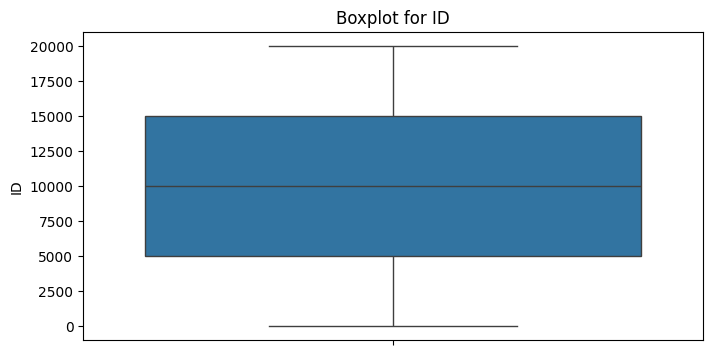

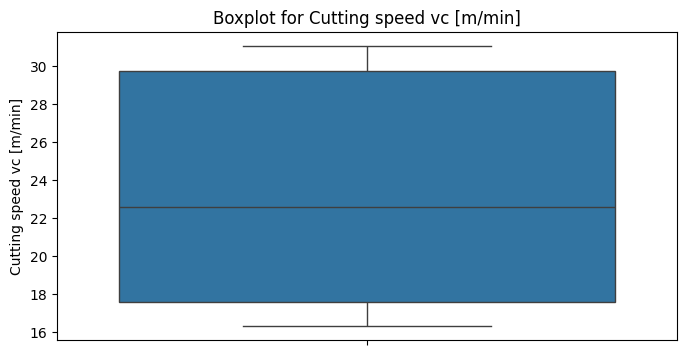

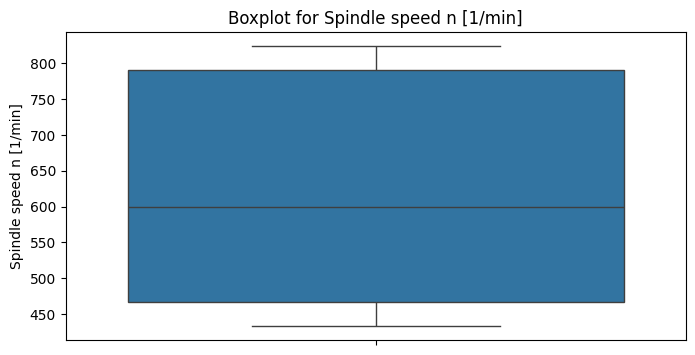

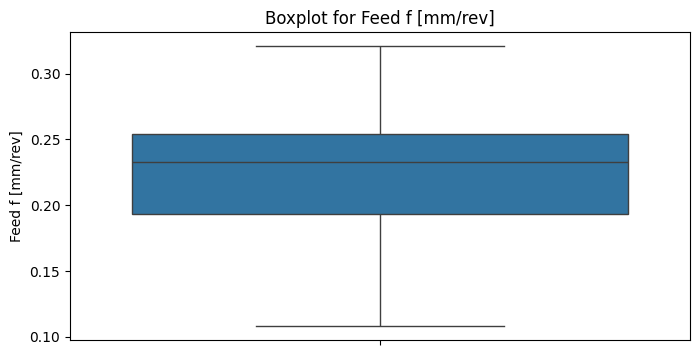

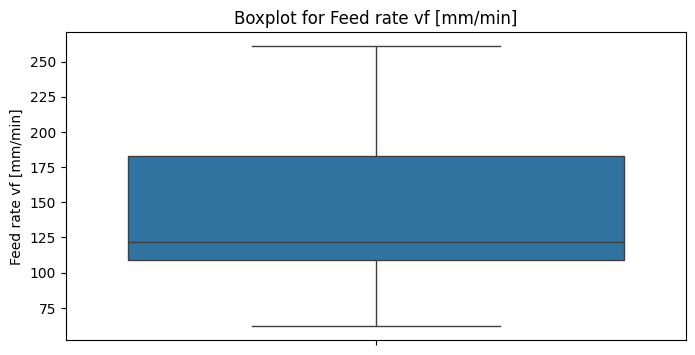

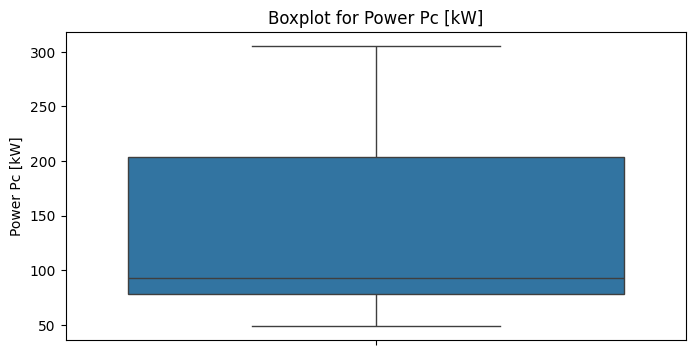

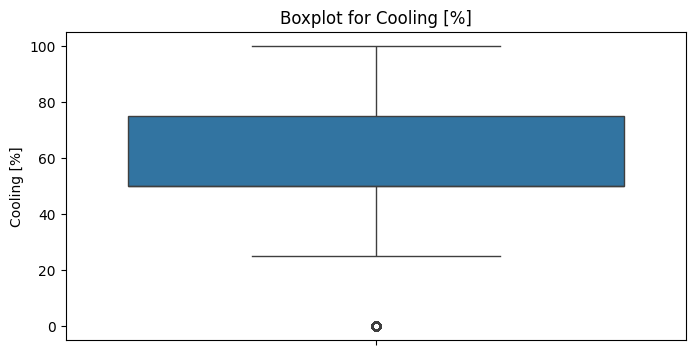

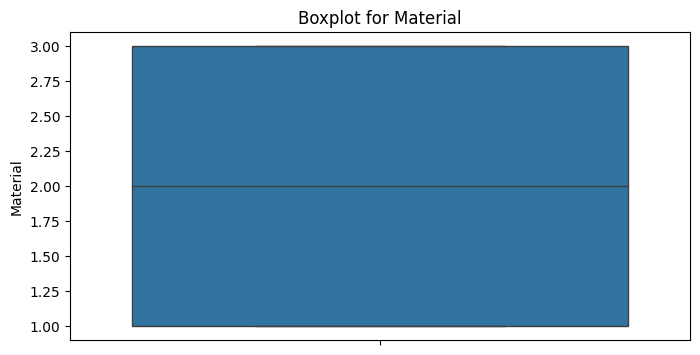

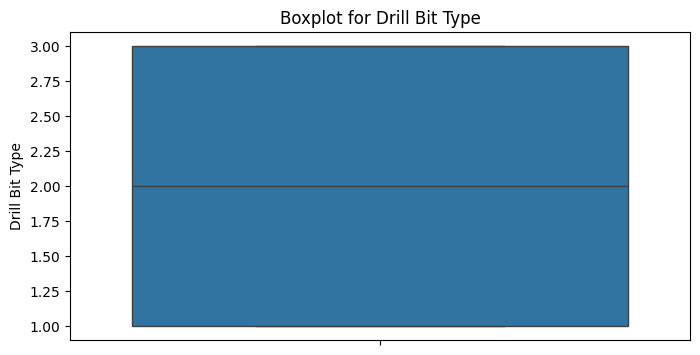

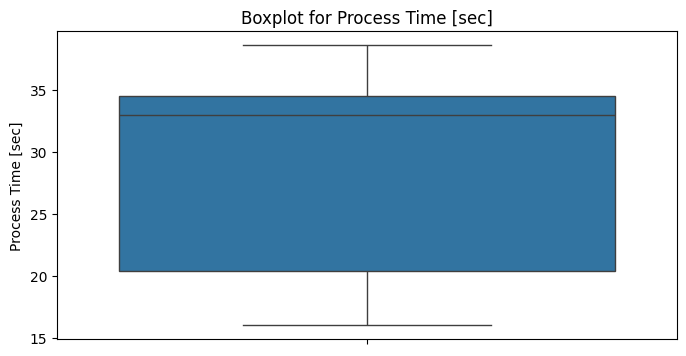

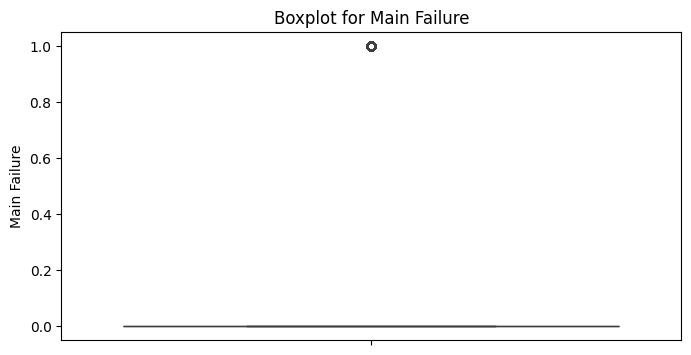

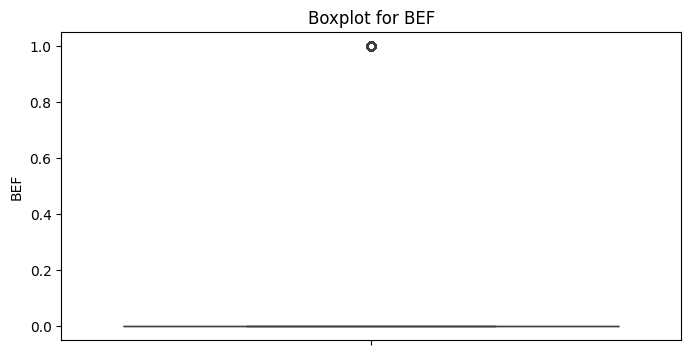

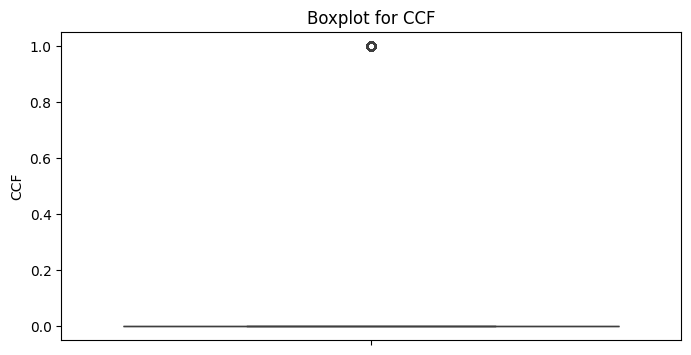

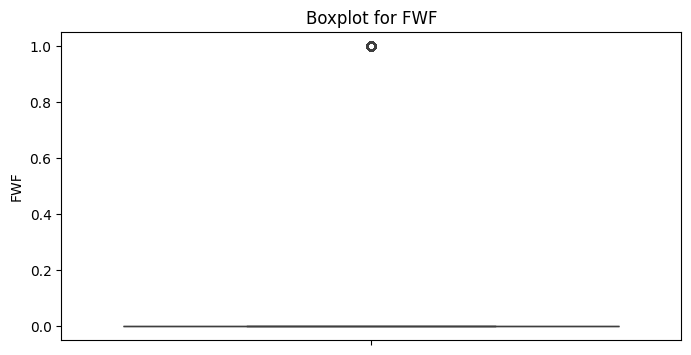

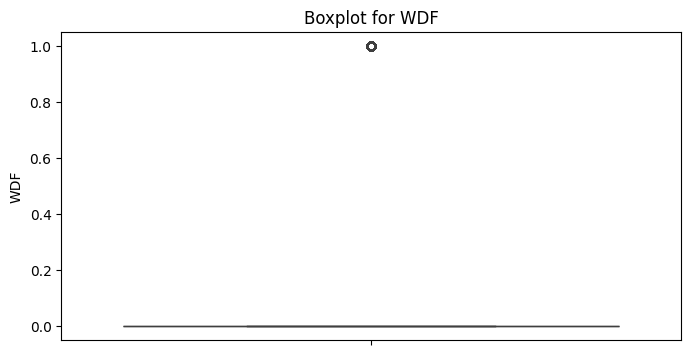

In [19]:
# Outlier Detection Using Boxplots for numeric columns

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
     
    plt.show()

In [20]:
# Save the cleaned dataset if needed
data.to_csv("dataset_2_cleaned).csv", index=False)